# Exploratory Data Analysis (EDA) of Heart Disease Data

**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

> Source: [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Overview

In [2]:
df = pd.read_csv(Path.cwd() / "heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPain       918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- The dataset contains 918 samples, each characterized by 11 distinct features.
- The features `Sex`, `ChestPain`, `FastingBS`, `RestingECG`, `ExerciseAngina`, and `ST_Slope` are categorical. We will use [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to encode them. We create separate encoders for each column and store it in a dictionary for later use.

In [4]:
target_variable = "HeartDisease"
categorical_features = ["Sex", "ChestPain", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]
numerical_features = set(df.columns).difference([target_variable, *categorical_features])

In [5]:
encoders = {}
for column in categorical_features:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

In [6]:
information = df.describe().T
missing = df.isna().sum(axis=0).rename("Missing Values")
unique = df.nunique().rename("Unique Values")

pd.concat([information, missing, unique], axis=1)

,count,mean,std,min,25%,50%,75%,max,Missing Values,Unique Values
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0,0,50
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0,0,2
ChestPain,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0,0,4
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0,0,67
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0,0,222
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0,0,2
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0,0,3
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0,0,119
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0,0,2
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2,0,53


On a first glance we can see that:

- Fortunately, the dataset contains no missing values, so there is no need for imputation or deletion of rows.
- All features exhibit a relatively high standard deviation, suggesting that low variance elimination methods like [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) may not be suitable.
- The value ranges of individual feature distributions vary significantly. We need to examine each feature to determine if it follows a normal distribution and to identify any outliers.

## Dataset Balance

As shown below the dataset is relatively balanced. If that wasn't the case, we might had to employ an oversampling technique, such as [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

<Axes: xlabel='HeartDisease', ylabel='Count'>

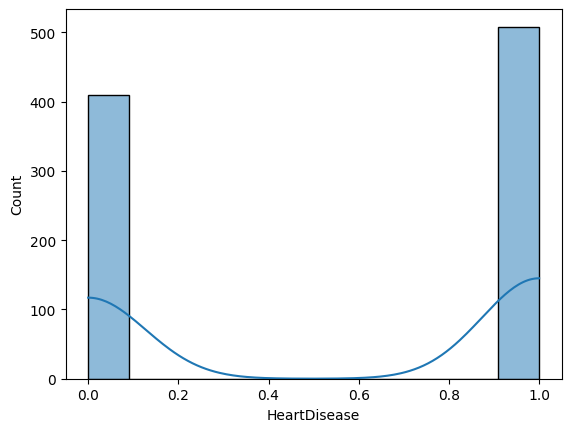

In [7]:
sns.histplot(df, x="HeartDisease", kde=True, stat="count")

## Feature Distribution & Outliers

To effectively train our model, it's crucial to analyze the distribution of each feature and identify any outliers. Based on these findings, we can decide whether to use [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) or [`RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) to normalize the features appropriately. The [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) might be worth considering if the features are not Gaussian. However, it is probably not the most suitable option since it assumes features are bounded within a specific range, which is not the case.

We know that categorical variables are inherently non-continuous and thus cannot follow a normal distribution. However, we can assess the distribution of continuous features to determine if they approximate a normal distribution.

Furthermore, the concept of outliers in categorical data is somewhat problematic. To identify an outlier, there needs to be a measure of difference between data. Taking this into consideration, we will exclude categorical features from our outlier detection process.

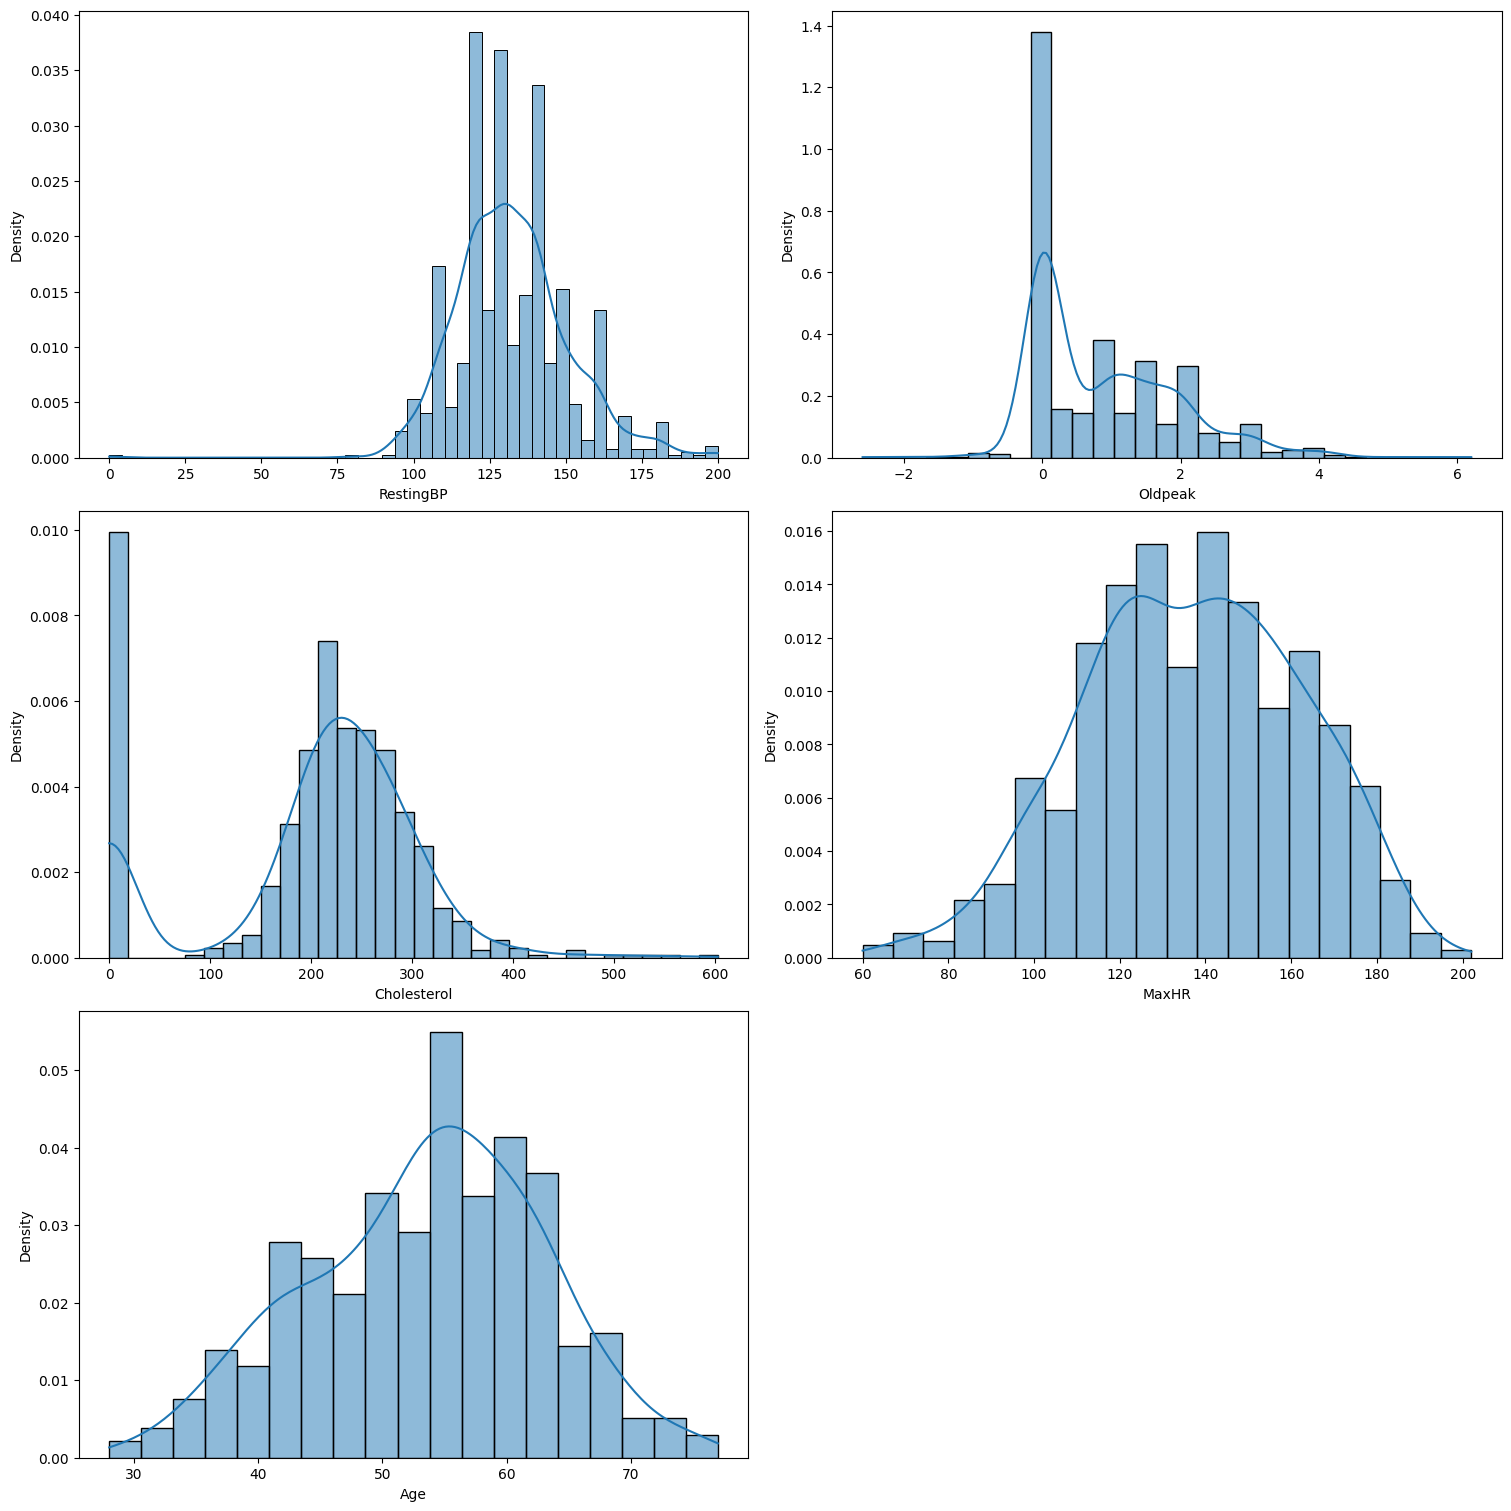

In [8]:
num_features = len(numerical_features)
num_cols = 2
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, stat="density", ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Based on our analysis, we can draw the following conclusions:

- **Age** and **MaxHR** appear to follow a normal distribution.
- **Oldpeak** is right-skewed.
- **Cholesterol** exhibits a bimodal distribution.
- **RestingBP** might follow a normal distribution, but its high variability prevents us from determining this with certainty.

It is evident that the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is probably not be suitable in this case.

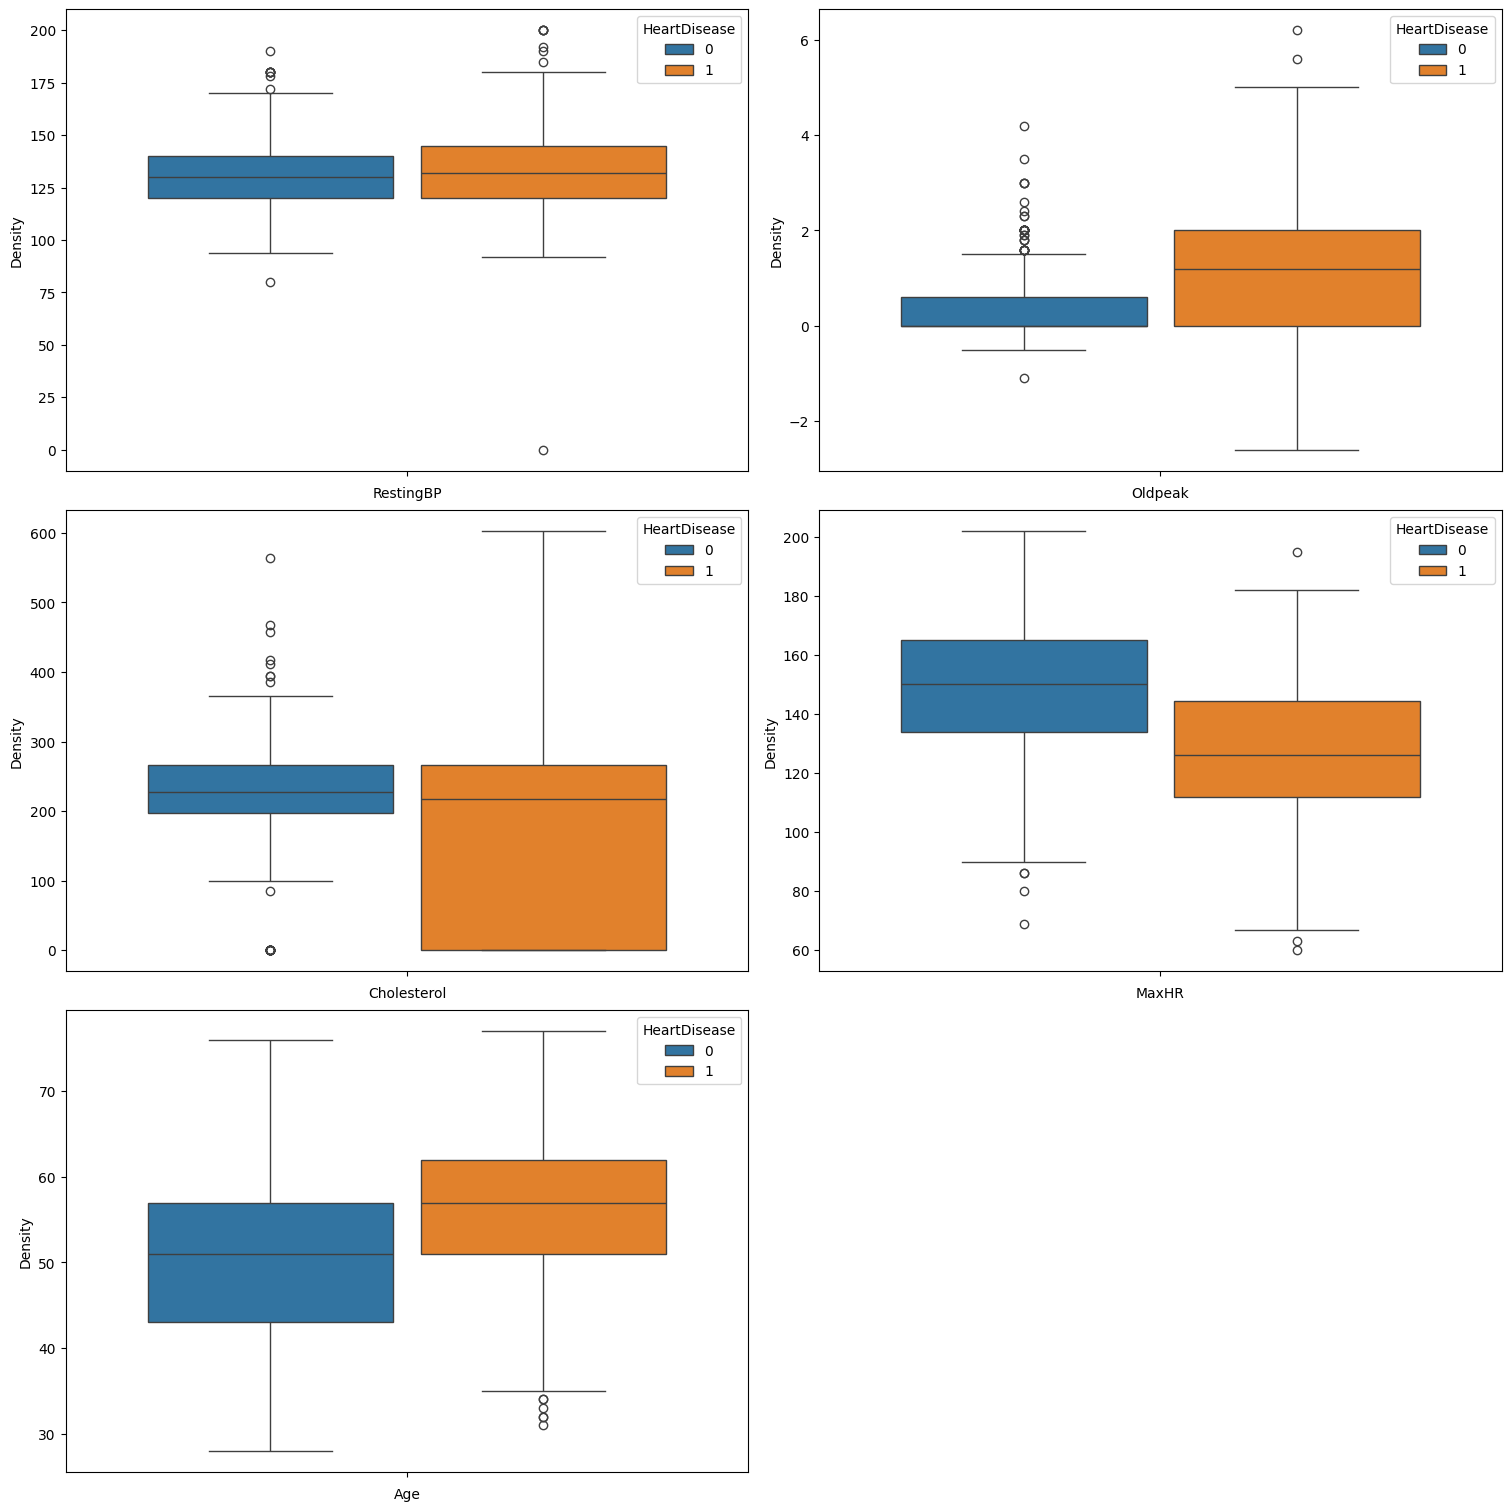

In [9]:
num_features = len(numerical_features)
num_cols = 2
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, hue="HeartDisease", ax=axes[i], gap=.1)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

It is evident that all features, exhibit at least some outliers. Consequently, we will apply the [`RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) for feature normalization to address these outliers effectively.

## Correlation Analysis

We now analyze the correlation between different features and our target variable, as well as examine the relationships among the features themselves, to gain deeper insights.

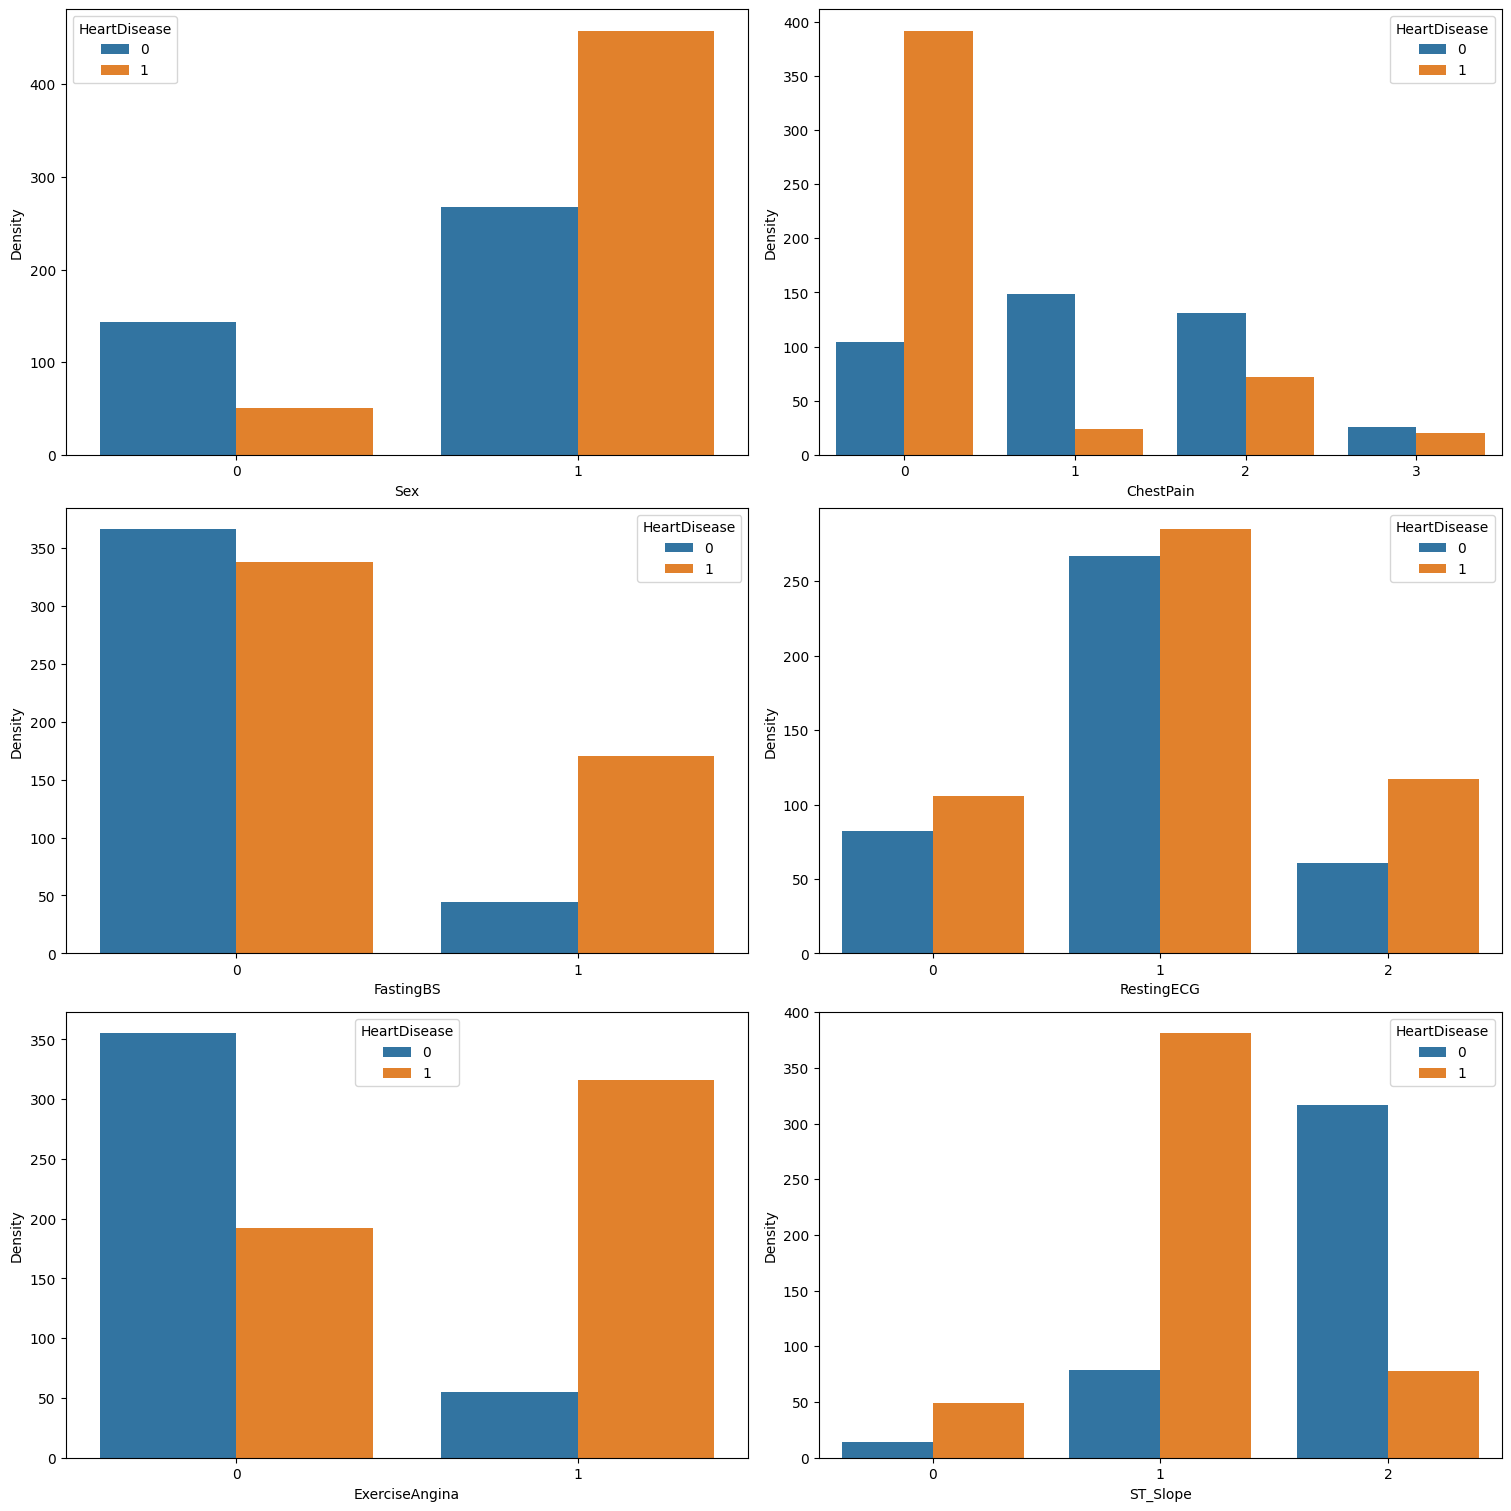

In [10]:
num_features = len(categorical_features)
num_cols = 2
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue="HeartDisease", ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

We can see that:

- Male patients are more prone to heart disease compared to female patients.
- Asymptomatic chest pain `ASY (0)` is highly indicative of heart disease, while typical angina `TA (3)` seems to have minimal effect on outcomes. In contrast, atypical angina `ATA (1)` and non-anginal pain `NAP (2)` seem to be negatively correlated with heart disease.
- A fasting blood sugar greater than 120 mg/dl `(FastingBS = 1)` is linked to a higher likelihood of heart disease. On the other hand, a fasting blood sugar less than 120 mg/dl `(FastingBS = 0)` is only marginally associated with a lower likelihood of heart disease.
- `RestingECG` does not appear to influence the likelihood of heart disease.
- Exercise-induced angina `(ExerciseAngina = 1)` is strongly associated with heart disease, while its absence is strongly correlated with a lower likelihood of the condition.
- A downward `ST_Slope` shows a slight correlation with heart disease, a flat `ST_Slope` is strongly correlated, and an upward `ST_Slope` is associated with a lower likelihood of heart disease.

> `RestingECG` could be considered insignificant and will most probably be dropped from the dataset.
 
We also observe that for some categorical features, certain values are predictive of heart disease, while others show no correlation with the condition (as in the case of `FastingBS`). To address this, we could apply [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). This technique converts categorical values into binary features, enabling the model to better interpret the presence or absence of specific categories and potentially enhancing predictive accuracy. Additionally, one-hot encoding prevents the algorithm from mistakenly assuming an ordinal relationship among the categories.

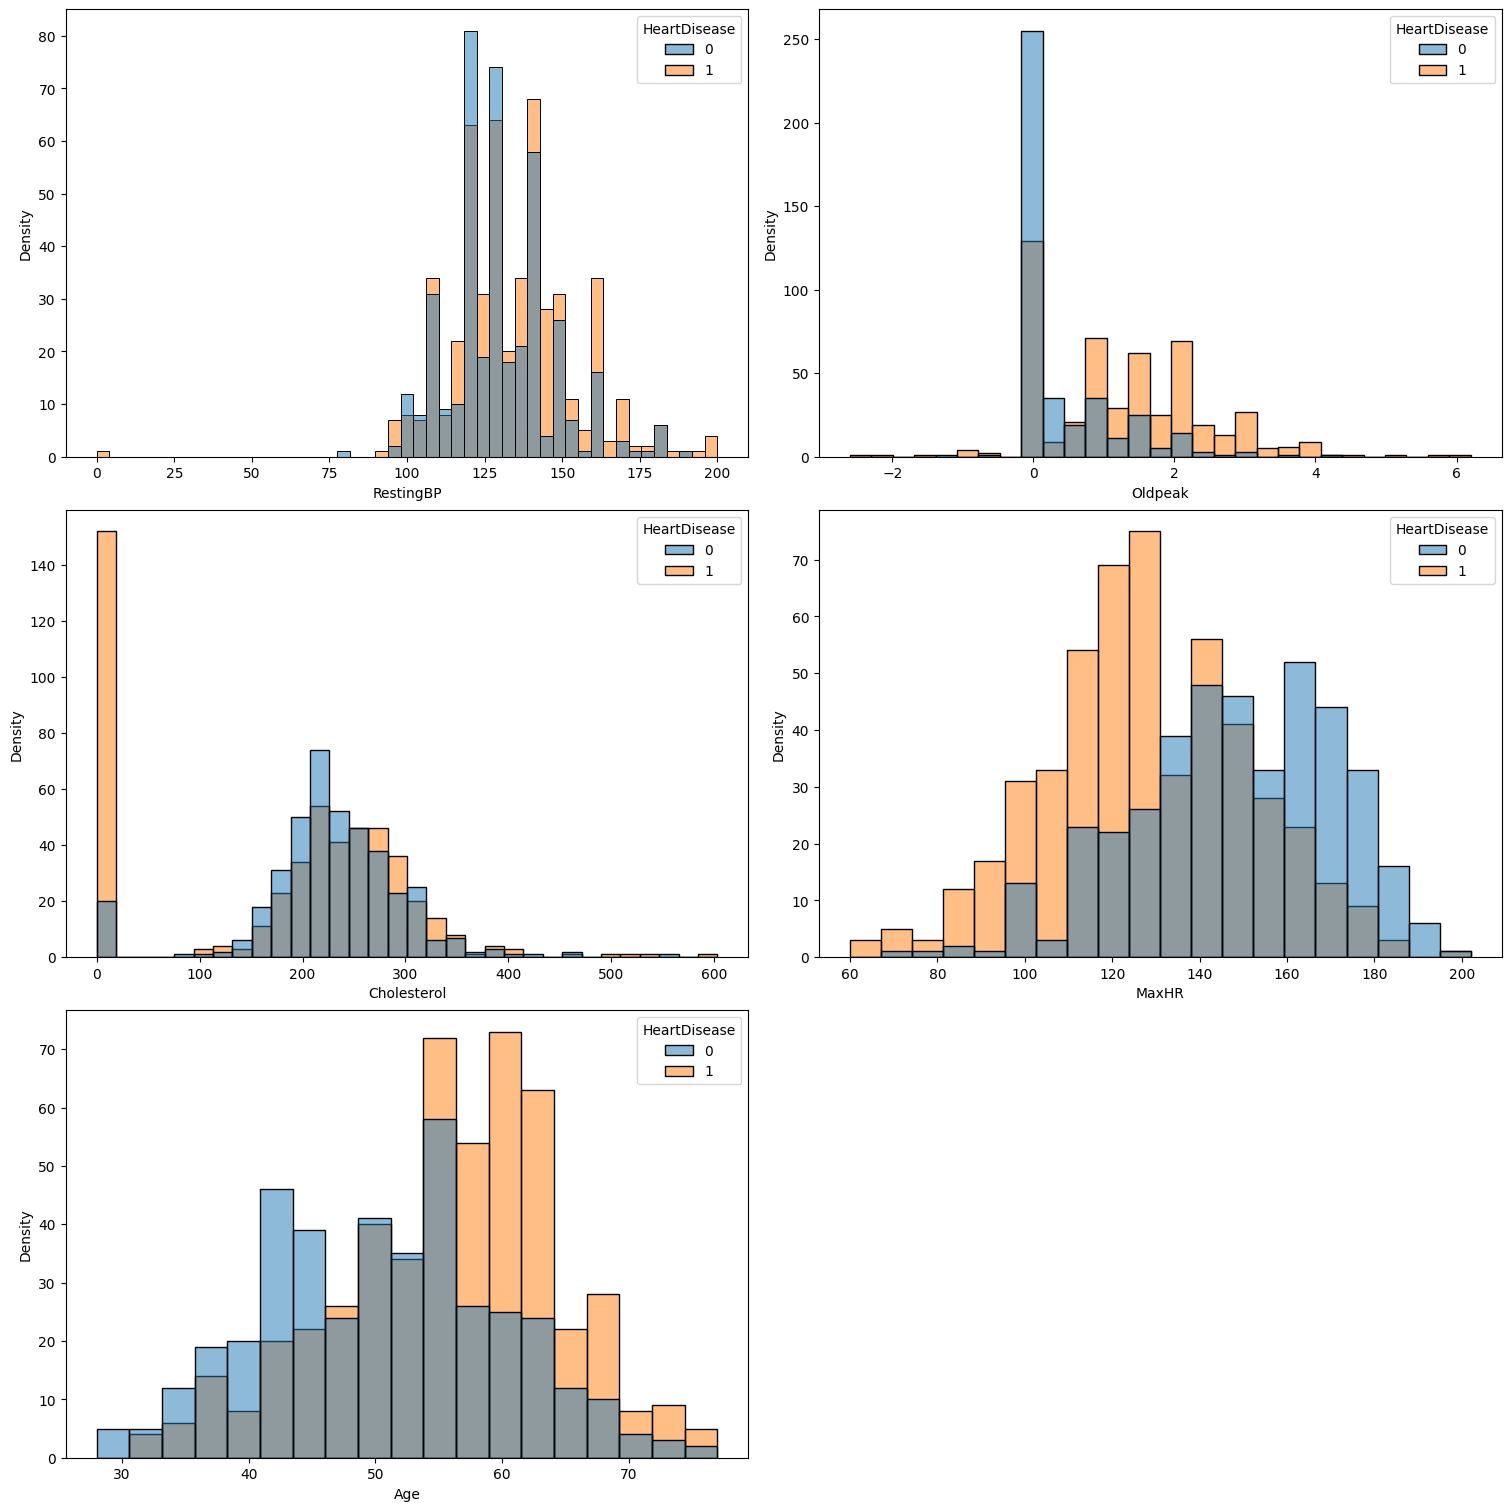

In [11]:
num_features = len(numerical_features)
num_cols = 2
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue="HeartDisease", ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

It's clear that:

- `Age` shows a strong correlation with heart disease, with older individuals being more likely to develop the condition.
- `Resting Blood Pressure (RestingBP)` is inversely related to heart disease risk with lower levels being associated with a reduced likelihood of heart disease.
- `Cholesterol levels` present a complex relationship with heart disease: both very low and very high cholesterol values are strongly correlated with an increased risk.
- `Maximum Heart Rate (MaxHR)` has a negative correlation with heart disease, meaning higher values are associated with a lower risk.
- Lower `Oldpeak` values are generally associated with a reduced likelihood of heart disease. However, there is some overlap at very low values, which can make interpretation more challenging.

> `RestingBP` may be omitted if further analysis deems it unimportant.

<Axes: >

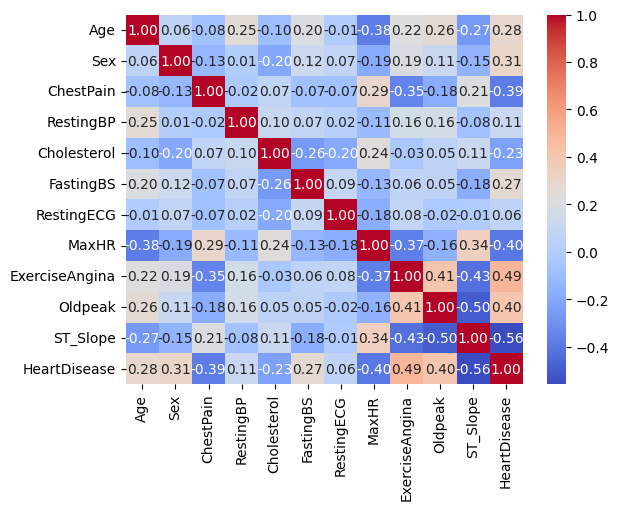

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

- The correlation matrix reveals a strong correlation between certain features, such as `ST_Slope` and `Oldpeak`. This high correlation can adversely affect the model's performance. To mitigate this issue, we need to consider strategies to address multicollinearity. Options include dropping one of the correlated features, combining them into a single variable, or selecting a model that is inherently resistant to multicollinearity, such as a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- We could also use [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to tackle the issue of multicollinearity, by transforming the original variables into a new set of uncorrelated variables.

In [13]:
df.corr().abs().drop('HeartDisease').nlargest(11, 'HeartDisease')['HeartDisease']

ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPain         0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.232741
RestingBP         0.107589
RestingECG        0.057384
Name: HeartDisease, dtype: float64

Our findings are consistent with our previous statements. The data indicates that `RestingECG` is the feature least correlated with `HeartDisease`, followed by `RestingBP`. Additionally, `Cholesterol` shows a weak correlation with `HeartDisease`. Notably, the correlation coefficients for these features are all below **0.15**. As a result, we will be removing these three features.

## Conclusions

- The dataset is balanced and contains no missing values, eliminating the need for imputation, row deletion, or oversampling.
- We conclude that `RestingECG`, `RestingBP`, and `Cholesterol` are not indicative of heart disease and will therefore be excluded from the dataset.
- We will use [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) as our baseline for encoding categorical variables, with [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) as an alternative approach.
- Numerical features are not normally distributed and contain outliers. To address this we will employ [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).
- We will consider only models that are robust to multicollinearity or apply PCA for models that are sensitive to it.

In [14]:
df.drop(columns=["RestingECG", "RestingBP", "Cholesterol"]).to_csv(Path.cwd() / "heart_processed.csv", index=False)